In [4]:
from pathlib import Path
import sys, importlib.util, os
parentPath = Path.cwd().parent
sys.path.insert(0, str(parentPath))  

%load_ext autoreload
%autoreload 2

In [33]:
from utils.game_physics import GameState, Ship, Asteroid
ship = Ship(x=400,y=300,vx=0.0,vy=0.0,heading=0.0)
asteroids = [
    Asteroid(x=100, y=100, vx=200, vy=150, size=30),
    Asteroid(x=700, y=500, vx=-150, vy=50, size=20),
    Asteroid(x=400, y=50, vx=0, vy=20, size=10),
]
game_state = GameState(ship=ship, asteroids=asteroids, bullets=[], t_s=0.0)

In [13]:
from utils.closed_loop import run_simulation
run_simulation(num_steps=50, game_state=game_state, feedback_mode_str="LOOP1")



=== STEP 0, t=0.000 s ===
Threat: Threat(left=0.33, center=0.0, right=0.55)
Stim freqs: StimFreqs(left_hz=20, center_hz=5, right_hz=30)
Firing counts: FiringCounts(left=2, right=0, thrust=0, shoot=1)
Action: Action(heading=<Heading.LEFT: 'left'>, thrust_on=False, shoot=True)
Hit: False Kill: False
Ship: x=400.0, y=300.0, vx=0.0, vy=0.0, heading_deg=-1.8
Feedback: FeedbackType.NONE pause_sensory: 0.0 reset_game: False

=== STEP 1, t=0.010 s ===
Threat: Threat(left=0.33, center=0.0, right=0.56)
Stim freqs: StimFreqs(left_hz=20, center_hz=5, right_hz=30)
Firing counts: FiringCounts(left=0, right=0, thrust=0, shoot=0)
Action: Action(heading=<Heading.NONE: 'none'>, thrust_on=False, shoot=False)
Hit: False Kill: False
Ship: x=400.0, y=300.0, vx=0.0, vy=0.0, heading_deg=-1.8
Feedback: FeedbackType.NONE pause_sensory: 0.0 reset_game: False

=== STEP 2, t=0.020 s ===
Threat: Threat(left=0.33, center=0.0, right=0.56)
Stim freqs: StimFreqs(left_hz=20, center_hz=5, right_hz=30)
Firing counts: Fir

MovieWriter ffmpeg unavailable; using Pillow instead.


Saving animation to bnn_asteroid_loop.gif ...
Done.


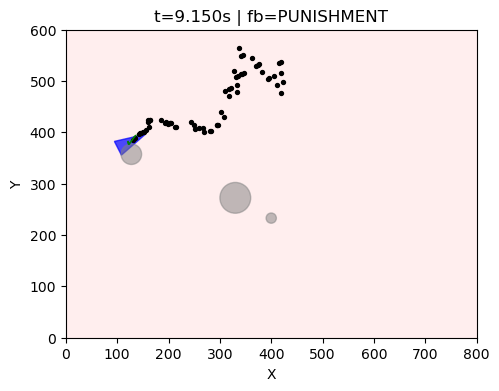

In [41]:
from utils.closed_loop import run_simulation_record, animate_history
# 3 seconds of play: 3 / 0.010 = 300 steps
history = run_simulation_record(num_steps=300,state=game_state, feedback_mode_str="LOOP1")
# visualize and save to MP4
animate_history(history, save_path="bnn_asteroid_loop.mp4", fps=30)